In [1]:
from datetime import datetime
import pytz

def parse_str(x):
    return x[1:-1]

def parse_datetime(x):
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [2]:
import re
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\USER\Desktop\NTUT\109-2\資訊安全導論\期末報告\apache_access_log.csv",
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,'status': int,'size': int,})

In [4]:
data.head()

,ip,time,request,status,size,referer,user_agent
0,嚜�83.149.9.216,2015-05-17 10:05:03+00:00,GET /presentations/logstash-monitorama-2013/im...,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,2015-05-17 10:05:43+00:00,GET /presentations/logstash-monitorama-2013/im...,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,2015-05-17 10:05:47+00:00,GET /presentations/logstash-monitorama-2013/pl...,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,2015-05-17 10:05:12+00:00,GET /presentations/logstash-monitorama-2013/pl...,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,2015-05-17 10:05:07+00:00,GET /presentations/logstash-monitorama-2013/pl...,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8899 entries, 0 to 8898
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   ip          8899 non-null   object             
 1   time        8899 non-null   datetime64[ns, UTC]
 2   request     8899 non-null   object             
 3   status      8899 non-null   int64              
 4   size        8262 non-null   object             
 5   referer     5333 non-null   object             
 6   user_agent  8717 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 486.8+ KB


In [6]:
request = data.pop('request').str.split()
data['resource'] = request.str[1]

In [7]:
data.head()

,ip,time,status,size,referer,user_agent,resource
0,嚜�83.149.9.216,2015-05-17 10:05:03+00:00,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/images...
1,83.149.9.216,2015-05-17 10:05:43+00:00,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/images...
2,83.149.9.216,2015-05-17 10:05:47+00:00,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...
3,83.149.9.216,2015-05-17 10:05:12+00:00,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...
4,83.149.9.216,2015-05-17 10:05:07+00:00,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...


In [8]:
data = data[(request.str[0] == 'GET') & (data.pop('status') == 200)]

In [9]:
data = data[~data['resource'].str.match(
    r'^/media|^/static|^/admin|^/robots.txt$|^/favicon.ico$')]

In [10]:
data = data[~data['user_agent'].str.match(
    r'.*?bot|.*?spider|.*?crawler|.*?slurp', flags=re.I).fillna(False)]

In [11]:
data = data[~data['ip'].str.startswith('123.125.71.')]  # Baidu IPs.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6222 entries, 0 to 8897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   ip          6222 non-null   object             
 1   time        6222 non-null   datetime64[ns, UTC]
 2   size        6222 non-null   object             
 3   referer     4680 non-null   object             
 4   user_agent  6136 non-null   object             
 5   resource    6222 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 340.3+ KB


In [13]:
data.head()

,ip,time,size,referer,user_agent,resource
0,嚜�83.149.9.216,2015-05-17 10:05:03+00:00,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/images...
1,83.149.9.216,2015-05-17 10:05:43+00:00,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/images...
2,83.149.9.216,2015-05-17 10:05:47+00:00,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...
3,83.149.9.216,2015-05-17 10:05:12+00:00,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...
4,83.149.9.216,2015-05-17 10:05:07+00:00,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,/presentations/logstash-monitorama-2013/plugin...


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
referers = data['referer'].dropna()

In [16]:
domains = referers.str.extract(r'^(https?://)?(www.)?([^/]*)')[2].str.lower()
domains.value_counts()[:2].divide(domains.count())

semicomplete.com    0.846154
google.com          0.042094
Name: 2, dtype: float64

In [17]:
google_searches = referers[referers.str.contains(r'^(https?://)?(www.)?(google.[^/]*)/search?')]

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [18]:
google_queries = google_searches.str.replace('+', ' ').str.extract(r'[?&]q=([^&]*)&?')

In [19]:
google_queries[:5]

,0
41,https//:google.com
237,www.google.com
546,proxy 50na50
584,google.com/
641,. www.google.com


In [20]:
data['weekday'] = data['time'].apply(lambda x: x.isoweekday())
weekdays = data.groupby('weekday')['ip'].agg(len)
weekdays = weekdays.divide(weekdays.sum())
weekdays

weekday
1    0.294761
2    0.346834
3    0.184024
7    0.174381
Name: ip, dtype: float64

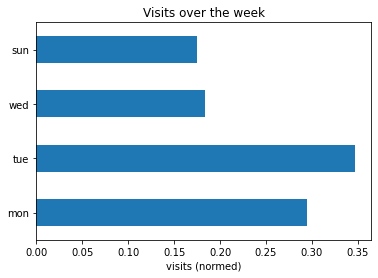

In [21]:
weekdays.index = ['mon', 'tue', 'wed', 'sun']
weekdays.plot(kind='barh')
plt.title('Visits over the week')
plt.xlabel('visits (normed)')
plt.show()

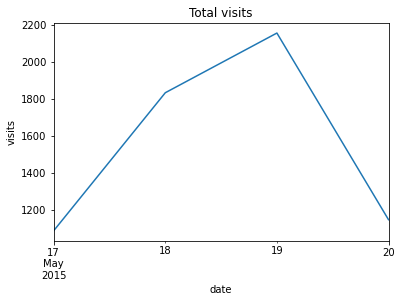

In [22]:
visits = data['resource'].copy()
visits.index = data['time']
visits = visits.resample('D', kind='period').count()
visits.index.name = 'date'
visits['5/2015':].plot()
plt.title('Total visits')
plt.ylabel('visits')
plt.show()

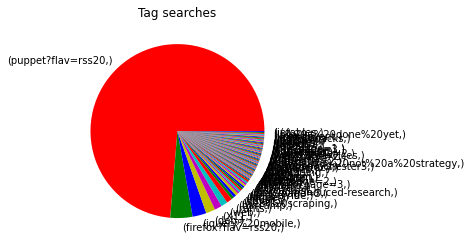

In [23]:
visits = data['resource'].copy()
tags = visits[visits.str.contains(r'/tags/')]
tags = tags.str.extract(r'/tags/(.*)')
tags.value_counts().plot(kind='pie', colors=list('rgbymc'))
plt.title('Tag searches')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [24]:
visits = data['resource'].copy()
visits.index = data['time']
entries = visits[visits.str.match(r'(?!.*/tags)(?!^/blog\/$)(?!^/lab/$)/[^\?]+$')]
entries = entries.str.replace(r'/blog/|/lab/', '/')
entries[:10]

time
2015-05-17 10:05:03+00:00    /presentations/logstash-monitorama-2013/images...
2015-05-17 10:05:43+00:00    /presentations/logstash-monitorama-2013/images...
2015-05-17 10:05:47+00:00    /presentations/logstash-monitorama-2013/plugin...
2015-05-17 10:05:12+00:00    /presentations/logstash-monitorama-2013/plugin...
2015-05-17 10:05:07+00:00    /presentations/logstash-monitorama-2013/plugin...
2015-05-17 10:05:34+00:00    /presentations/logstash-monitorama-2013/images...
2015-05-17 10:05:57+00:00    /presentations/logstash-monitorama-2013/css/fo...
2015-05-17 10:05:50+00:00    /presentations/logstash-monitorama-2013/css/fo...
2015-05-17 10:05:24+00:00    /presentations/logstash-monitorama-2013/images...
2015-05-17 10:05:50+00:00    /presentations/logstash-monitorama-2013/images...
Name: resource, dtype: object

In [25]:
for i in entries.unique():
    print (i)

/presentations/logstash-monitorama-2013/images/kibana-search.png
/presentations/logstash-monitorama-2013/images/kibana-dashboard3.png
/presentations/logstash-monitorama-2013/plugin/highlight/highlight.js
/presentations/logstash-monitorama-2013/plugin/zoom-js/zoom.js
/presentations/logstash-monitorama-2013/plugin/notes/notes.js
/presentations/logstash-monitorama-2013/images/sad-medic.png
/presentations/logstash-monitorama-2013/css/fonts/Roboto-Bold.ttf
/presentations/logstash-monitorama-2013/css/fonts/Roboto-Regular.ttf
/presentations/logstash-monitorama-2013/images/frontend-response-codes.png
/presentations/logstash-monitorama-2013/images/kibana-dashboard.png
/presentations/logstash-monitorama-2013/images/Dreamhost_logo.svg
/presentations/logstash-monitorama-2013/images/kibana-dashboard2.png
/presentations/logstash-monitorama-2013/images/apache-icon.gif
/presentations/logstash-monitorama-2013/images/nagios-sms5.png
/presentations/logstash-monitorama-2013/images/redis.png
/presentations

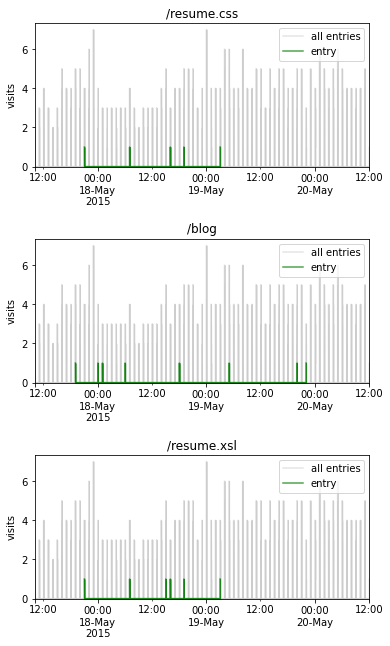

In [51]:
urls = ['/resume.css', '/blog', '/resume.xsl']
entries = entries['5/2015']
all_entries = entries.resample('1S', kind='period').count()
for i, url in enumerate(urls):
    entry = entries[entries==url].resample('1S', kind='period').count()
    entry.index.name = 'date'
    plt.subplot(int('31%d' % (i+1)))
    plt.title(url)
    all_entries.plot(kind='area', color='k', alpha=.1)
    entry.plot(kind='area', color='g', alpha=.7)
    plt.legend(['all entries', 'entry'], prop={'size': 10})
    plt.xlabel('')
    plt.ylabel('visits')
plt.subplots_adjust(top=3,bottom=1,hspace=0.5)
plt.show()